**EXPLORATORY DATA ANALYSIS**

In [23]:
#iMPORTING RELEVANT MODULES
import pandas as pd
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation
sns.set_style('whitegrid')
%matplotlib inline
#for PCA
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
sns.set_style('whitegrid')
%matplotlib inline
import scipy.cluster.hierarchy as sch #FOR DENDOGRAM
import sklearn.cluster as cluster
import time
import collections
from itertools import cycle, islice
import warnings
# warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 100, 'linewidths':0}


In [2]:
#READING IN DATASET
dataset = pd.read_csv('turkiye-student-evaluation_generic.csv')
dataset.head()


,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
#stats about the dataset
dataset.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 <a list of 33 Text yticklabel objects>)

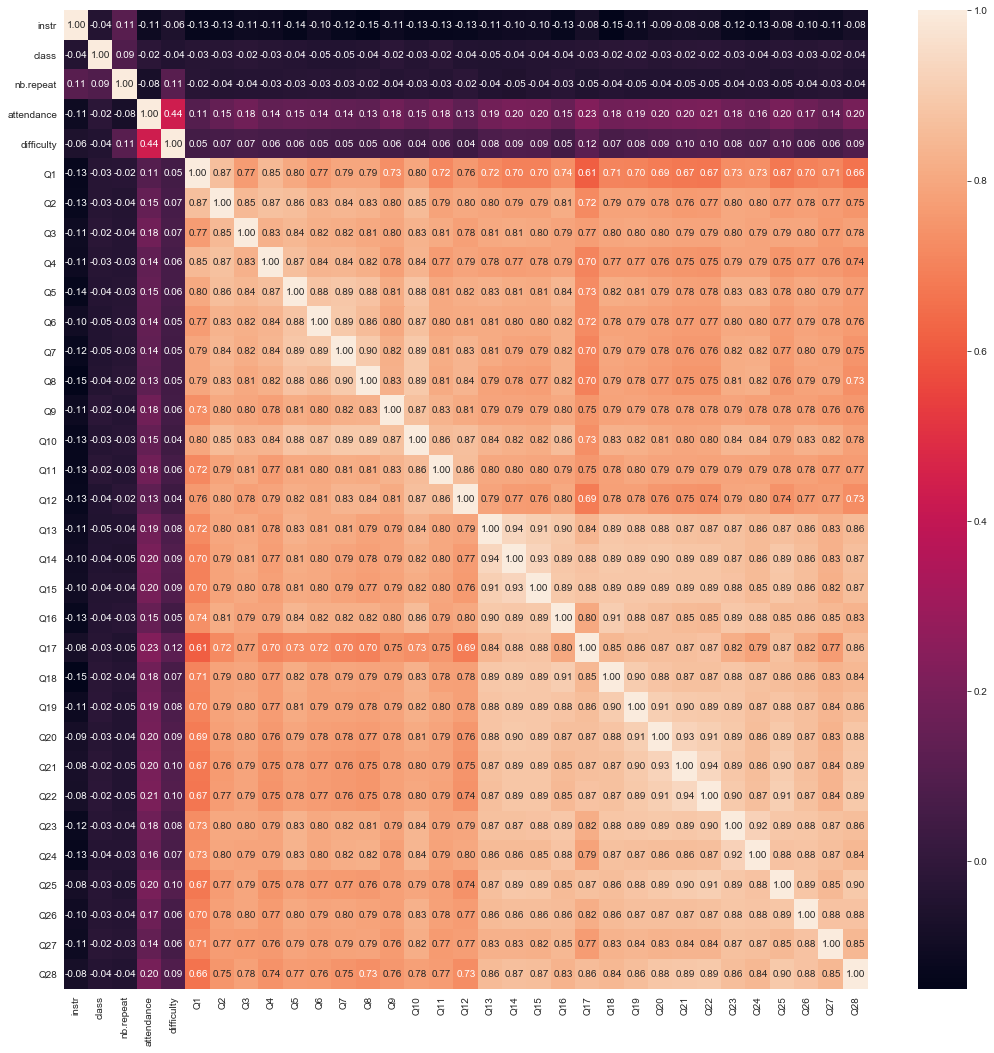

In [4]:
#visualising Correlation amongst varibles
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

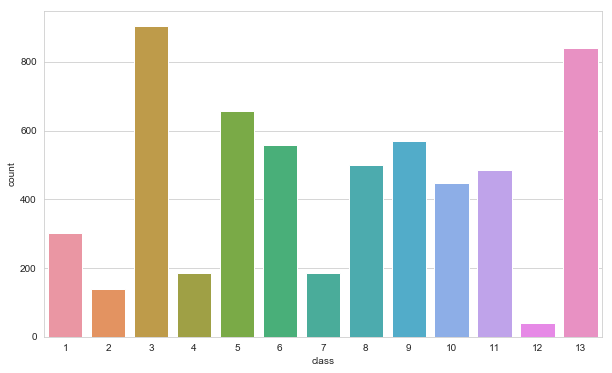

In [5]:
#Question with most responses
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=dataset)

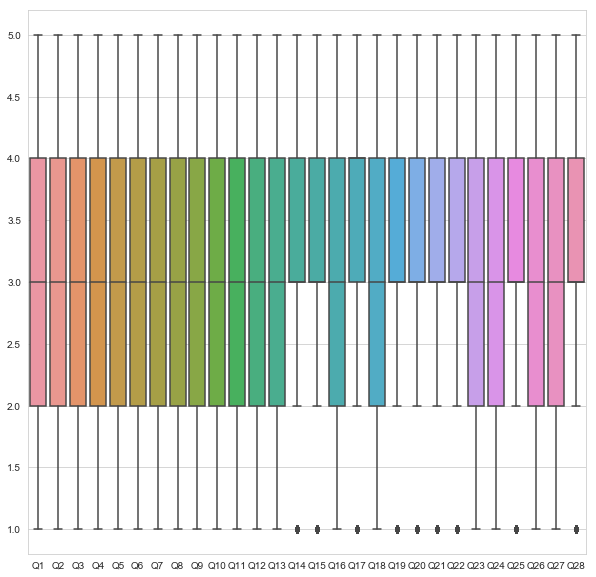

In [6]:
#How much score is been given to each question out of {1,2,3,4,5}
plt.figure(figsize=(10,10))
sns.boxplot(data=dataset.iloc[:,5:33 ])

For Questions Q14,Q15,Q17,Q19,Q20,Q21,Q22,Q25,Q28 students have not given any disagreement most of them agree to it.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


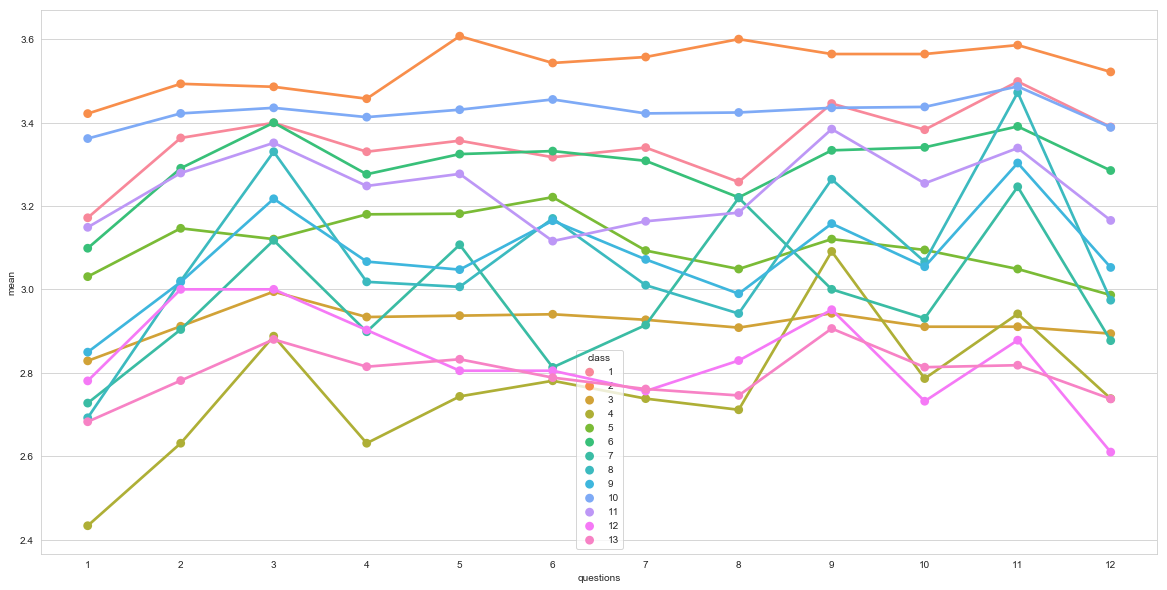

In [7]:
# Calculate mean for each question response for all the classes.
questionmeans = []
classlist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
for class_num in range(1,14):
    class_data = dataset[(dataset["class"]==class_num)]
    
    questionmeans = []
    classlist = []
    questions = []
    
    for num in range(1,14):
        questions.append(num)
    #Class related questions are from Q1 to Q12
    for col in range(5,17):
        questionmeans.append(class_data.iloc[:,col].mean())
    classlist += 12 * [class_num] 
    print(classlist)
    plotdata = pd.DataFrame(list(zip(classlist,questions,questionmeans))
                      ,columns=['class','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
plt.figure(figsize=(20, 10))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="class")
    

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

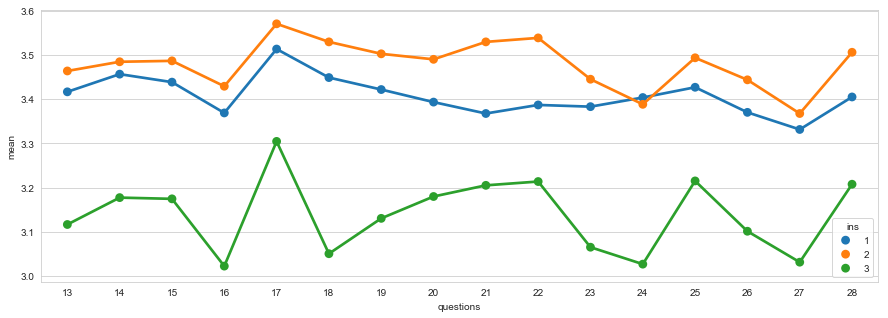

In [8]:
#Rating given instructor wise
# Calculate mean for each question response for all the classes.
questionmeans = []
inslist = []
questions = []
totalplotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
for ins_num in range(1,4):
    ins_data = dataset[(dataset["instr"]==ins_num)]
    questionmeans = []
    inslist = []
    questions = []
    
    for num in range(13,29):
        questions.append(num)
    
    for col in range(17,33):
        questionmeans.append(ins_data.iloc[:,col].mean())
    inslist += 16 * [ins_num] 
    plotdata = pd.DataFrame(list(zip(inslist,questions,questionmeans))
                      ,columns=['ins','questions', 'mean'])
    totalplotdata = totalplotdata.append(plotdata, ignore_index=True)
    plt.figure(figsize=(15, 5))
sns.pointplot(x="questions", y="mean", data=totalplotdata, hue="ins")

**PREPROCESSING DATA**

In [9]:
#Clustering students based on their response
dataset_questions = dataset.iloc[:,5:]
dataset_questions.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


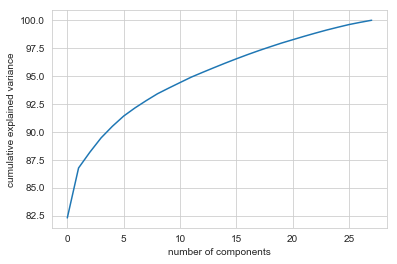

In [10]:
#performing principal component analysis on Data
X = dataset_questions
pca = PCA().fit(scale(X))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [11]:
#bariance (%cumulative explained by the principal component analysis)
pca = PCA(n_components = 2)
dataset_questions_pca = pca.fit_transform(dataset_questions)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
print(len(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)))

[82.2  86.72]
2


In [12]:
np.cumsum(pca.explained_variance_ratio_)*100

array([82.19814548, 86.71381679])

In [13]:
#Eigen Values
pca.explained_variance_


array([37.57046567,  2.06398664])

**CLUSTERING**

**1- KMEANS CLUSTERING**

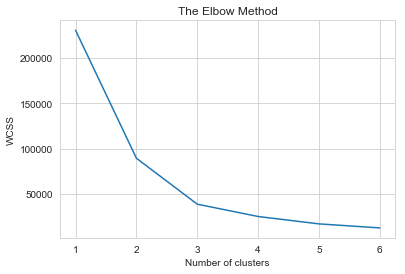

In [14]:
#IMPLEMENTING KMEANS
from sklearn.cluster import KMeans
DATA = dataset_questions_pca
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(DATA)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
#FINDING NUMBER OF CLUSTERS
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Since there is an elbow at 3 we select the number of clusters as 3.

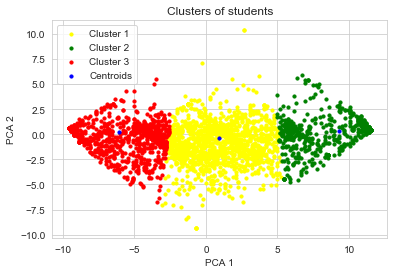

In [15]:
#Based on the elbow method we go for three clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(DATA)
# Visualising the clusters
plt.scatter(DATA[y_kmeans == 0, 0], DATA[y_kmeans == 0, 1], s = 10, c = 'yellow', label = 'Cluster 1')
plt.scatter(DATA[y_kmeans == 1, 0], DATA[y_kmeans == 1, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(DATA[y_kmeans == 2, 0], DATA[y_kmeans == 2, 1], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'blue', label = 'Centroids')
plt.title('Clusters of students')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [24]:
#FUNCTION TO PLOT RESULTS OF EVERY ALGORITHM
import collections
from sklearn import cluster
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    print(collections.Counter(labels))
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    

**1- KMEANS**

Counter({2: 2358, 1: 2222, 0: 1240})


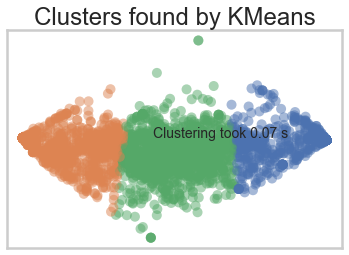

In [25]:
plot_clusters(DATA, cluster.KMeans, (), {'n_clusters':3})

Text(0, 0.5, 'Silhouette Score')

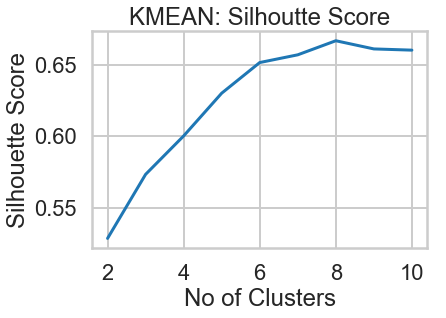

In [26]:
sil = []
t_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in t_clusters:
    one_mean = cluster.KMeans(n_clusters=n_cluster)
    x = one_mean.fit(DATA)
    labels = one_mean.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(t_clusters,sil)
plt.title('KMEAN: Silhoutte Score')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score")

**2-MINIBATCH KMEANS**

Counter({2: 2357, 0: 2223, 1: 1240})


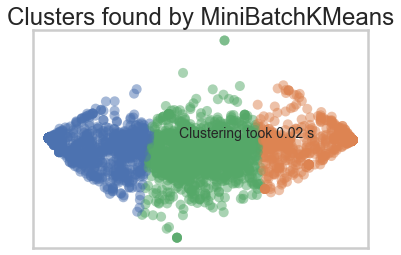

In [28]:
plot_clusters(DATA, cluster.MiniBatchKMeans, (), {'n_clusters':3,'batch_size':200})

Text(0, 0.5, 'Silhouette Score')

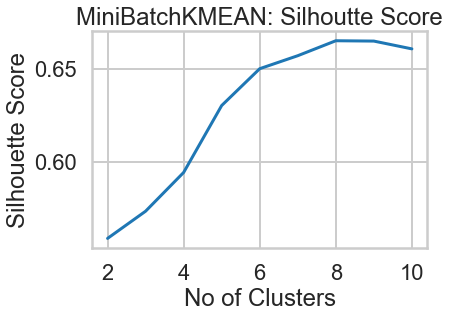

In [29]:
sil = []
t_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in t_clusters:
    algo = cluster.MiniBatchKMeans(n_clusters=n_cluster,batch_size=200)
    x = algo.fit(DATA)
    labels = algo.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(t_clusters,sil)
plt.title('MiniBatchKMEAN: Silhoutte Score')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score") 

**3-AFFINITY PROPAGATION**

Counter({2264: 648, 20: 637, 1256: 325, 527: 84, 968: 69, 1835: 53, 2301: 51, 1539: 50, 2138: 49, 1034: 49, 1820: 46, 2006: 46, 1302: 45, 1827: 42, 2339: 42, 1787: 40, 1270: 36, 604: 35, 2007: 34, 2025: 33, 1769: 33, 2197: 32, 1789: 30, 1684: 30, 2402: 30, 2373: 29, 1781: 28, 1685: 24, 1259: 23, 1313: 18, 486: 18, 412: 18, 1940: 17, 856: 17, 1858: 16, 460: 16, 1037: 15, 574: 15, 1832: 15, 116: 14, 1627: 13, 1063: 13, 2313: 13, 2368: 13, 1849: 13, 1829: 12, 52: 12, 1561: 12, 1882: 12, 1804: 12, 967: 11, 97: 11, 1178: 11, 389: 11, 1521: 11, 2009: 10, 1625: 10, 1784: 10, 1513: 10, 725: 10, 2344: 10, 806: 9, 1074: 9, 1939: 9, 2430: 9, 343: 9, 2094: 9, 105: 8, 2294: 8, 396: 7, 2110: 7, 1372: 7, 584: 7, 889: 7, 2417: 7, 727: 7, 730: 7, 1340: 7, 1624: 6, 76: 6, 825: 6, 1680: 6, 1831: 6, 2001: 6, 1323: 5, 883: 5, 659: 5, 296: 5, 434: 5, 1460: 5, 1248: 5, 1419: 5, 1386: 5, 102: 4, 1766: 4, 1861: 4, 2075: 4, 1438: 4, 320: 4, 409: 4, 1852: 4, 729: 4, 2309: 4, 1033: 4, 1164: 4, 782: 3, 1567: 3, 15

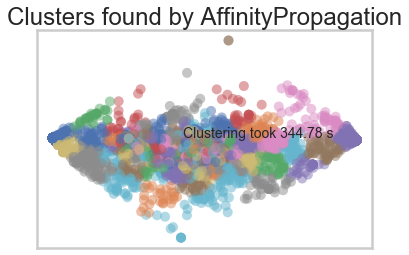

In [43]:
plot_clusters(DATA, cluster.AffinityPropagation, (), {'preference':-200,'damping':0.6})

**4-MEANSHIFT**

Counter({0: 4468, 1: 1352})


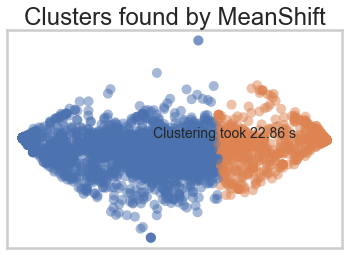

In [30]:
bandwidth = cluster.estimate_bandwidth(DATA, quantile=0.3)
plot_clusters(DATA, cluster.MeanShift, (bandwidth,), {'cluster_all':True})

**5-SPECTRAL**

Counter({2: 5070, 0: 748, 1: 2})


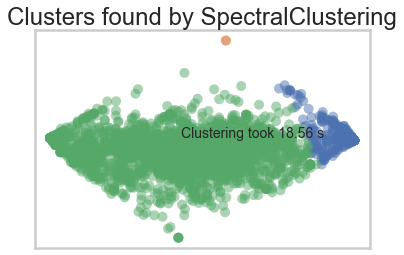

In [31]:
plot_clusters(DATA, cluster.SpectralClustering, (), {'n_clusters':3})

Text(0, 0.5, 'Silhouette Score')

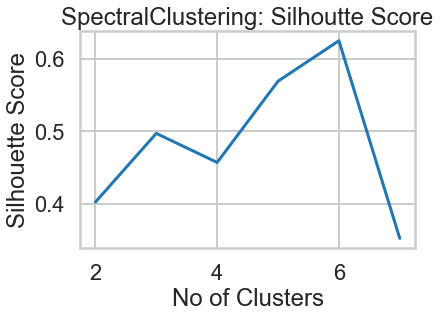

In [32]:
sil = []
t_clusters = [2,3,4,5,6,7]
for n_cluster in t_clusters:
    algo = cluster.SpectralClustering(n_clusters=n_cluster)
    x = algo.fit(DATA)
    labels = algo.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(t_clusters,sil)
plt.title('SpectralClustering: Silhoutte Score')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score")    

**6-AGGLOMERATIVE**

Counter({0: 4513, 1: 1301, 2: 6})


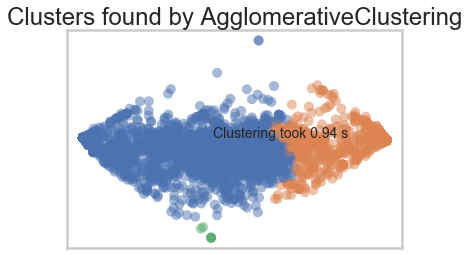

In [35]:
#Using the denogram
# dendrogram = sch.dendrogram(sch.linkage(X, method = 'average'))
#plt.figure(figsize=(20, 10))
# plt.title('Dendrogram')
# plt.xlabel('questions')
# plt.ylabel('Euclidean distances')
# plt.show()
plot_clusters(DATA, cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'average'})


Text(0, 0.5, 'Silhouette Score')

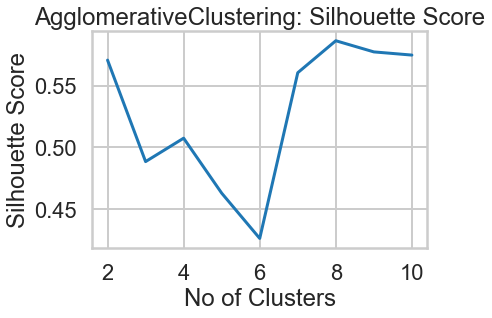

In [37]:
sil = []
t_clusters = [2,3,4,5,6,7,8,9,10]
for n_cluster in t_clusters:
    algo = cluster.AgglomerativeClustering(n_clusters=n_cluster,linkage = 'average')
    x = algo.fit(DATA)
    labels = algo.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(t_clusters,sil)
plt.title('AgglomerativeClustering: Silhouette Score')
plt.xlabel("No of Clusters")
plt.ylabel("Silhouette Score")   

**7-DBSCAN**

Counter({0: 3748, 1: 852, 2: 687, -1: 107, 6: 18, 50: 17, 25: 16, 15: 15, 3: 14, 5: 13, 10: 13, 9: 12, 38: 12, 4: 10, 7: 10, 12: 10, 60: 10, 16: 9, 42: 9, 19: 8, 55: 8, 22: 7, 26: 7, 31: 6, 35: 6, 43: 5, 54: 5, 68: 5, 70: 5, 77: 5, 11: 4, 13: 4, 17: 4, 20: 4, 24: 4, 28: 4, 32: 4, 34: 4, 37: 4, 40: 4, 44: 4, 59: 4, 66: 4, 87: 4, 29: 3, 33: 3, 41: 3, 46: 3, 49: 3, 52: 3, 58: 3, 61: 3, 65: 3, 71: 3, 75: 3, 76: 3, 78: 3, 80: 3, 82: 3, 86: 3, 91: 3, 8: 2, 14: 2, 18: 2, 21: 2, 23: 2, 27: 2, 30: 2, 36: 2, 39: 2, 45: 2, 47: 2, 48: 2, 51: 2, 53: 2, 56: 2, 57: 2, 62: 2, 63: 2, 64: 2, 67: 2, 69: 2, 72: 2, 73: 2, 74: 2, 79: 2, 81: 2, 83: 2, 84: 2, 85: 2, 88: 2, 89: 2, 90: 2})


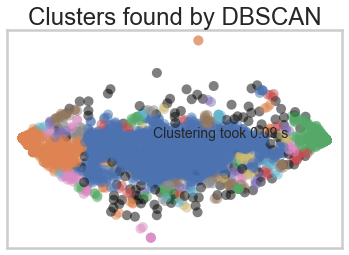

In [38]:
plot_clusters(DATA, cluster.DBSCAN, (), {'eps':0.311,'min_samples': 2})

Text(0, 0.5, 'Silhouette Score')

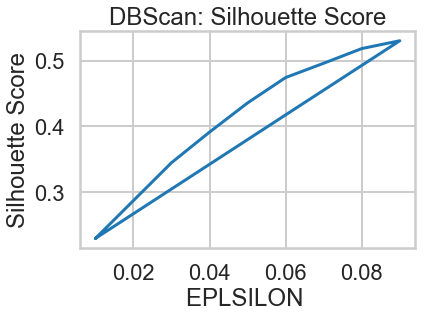

In [39]:
sil = []
epsilons = [0.01,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.01]
samples = [1,2,3,4,5,6,7,8,9,10]
for eps in epsilons:
    algo = cluster.DBSCAN(eps=eps,min_samples = 2)
    x = algo.fit(DATA)
    labels = algo.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(epsilons,sil)
plt.title('DBScan: Silhouette Score')
plt.xlabel("EPLSILON ")
plt.ylabel("Silhouette Score")  

Text(0, 0.5, 'Silhouette Score')

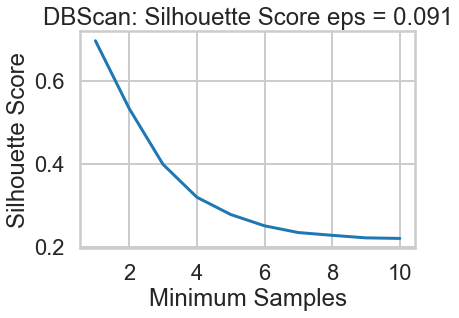

In [40]:
sil = []
samples = [1,2,3,4,5,6,7,8,9,10]
for sample in samples:
    algo = cluster.DBSCAN(eps=0.091,min_samples = sample)
    x = algo.fit(DATA)
    labels = algo.labels_
    sil.append(metrics.silhouette_score(DATA,labels, metric='euclidean'))
plt.plot(samples,sil)
plt.title('DBScan: Silhouette Score eps = 0.091')
plt.xlabel("Minimum Samples")
plt.ylabel("Silhouette Score") 

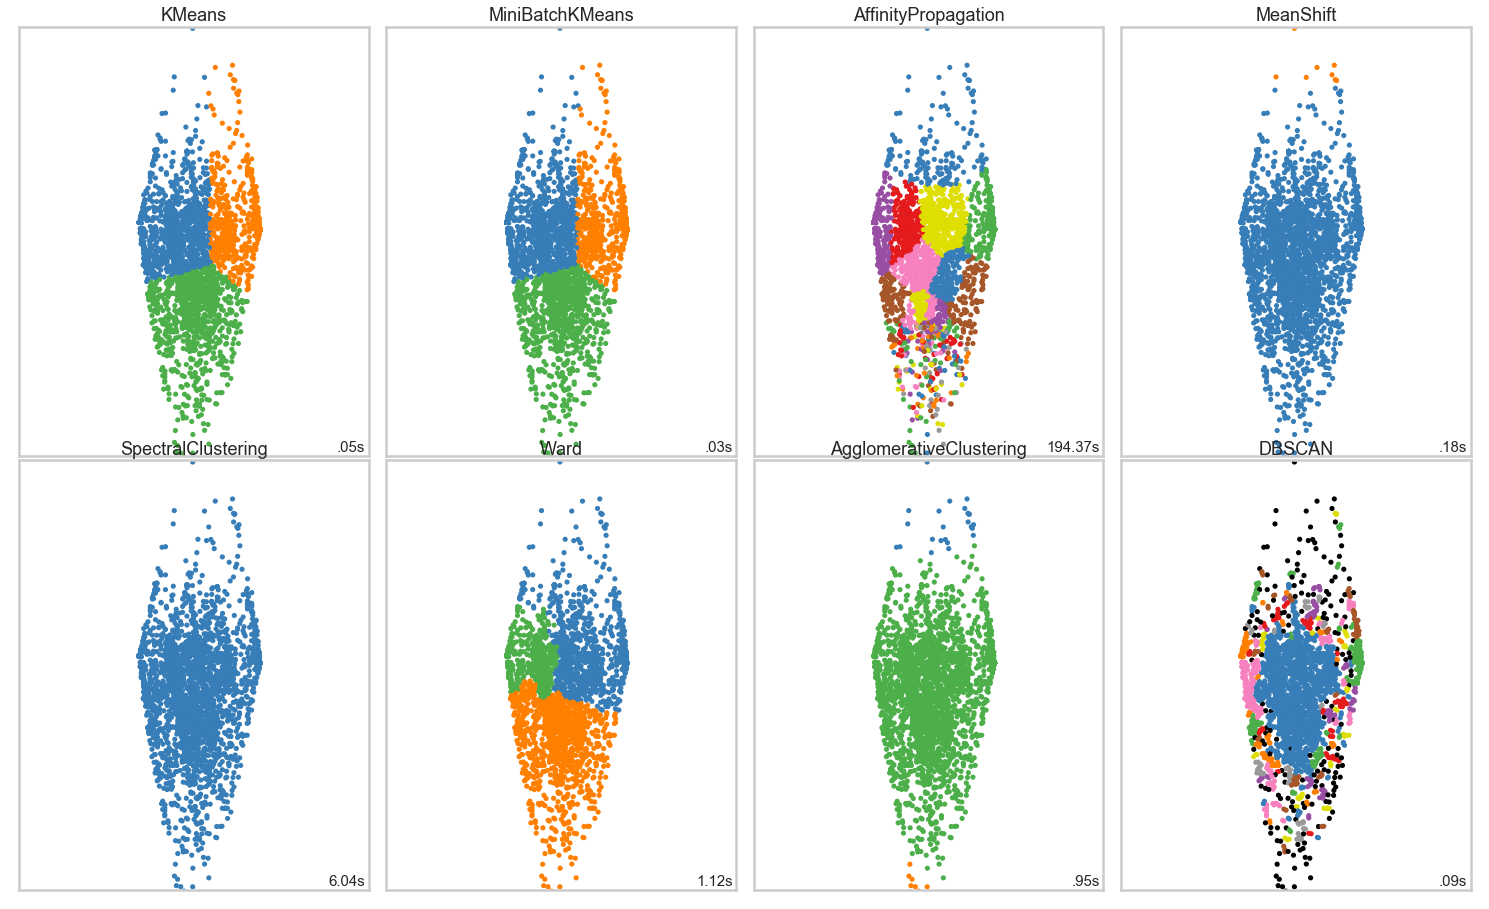

In [42]:
np.random.seed(0)
# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

damping = 0.6
preference = -200
n_clusters = 3
quantile = 0.3
eps = 0.091
n_neighbors =10

X = DATA

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=quantile)


# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

one_mean = cluster.KMeans(n_clusters=n_clusters)

two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters,batch_size=200)

ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

spectral = cluster.SpectralClustering(n_clusters= n_clusters)

dbscan = cluster.DBSCAN(eps=eps,min_samples = 2)

affinity_propagation = cluster.AffinityPropagation(damping=0.6, preference=-200)

average_linkage = cluster.AgglomerativeClustering(linkage="average",n_clusters=n_clusters)

clustering_algorithms = (
    ('KMeans', one_mean),
    ('MiniBatchKMeans', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan)
    )

for name, algorithm in clustering_algorithms:
    t0 = time.time()

    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
        message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
        category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(2,4, plot_num)
    plt.title(name, size=18)

    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xticks(())
    plt.yticks(())
    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
             transform=plt.gca().transAxes, size=15,
         horizontalalignment='right')
    plot_num += 1

plt.show()


In [43]:
X = DATA
algorithms = []
algorithms.append(one_mean)
algorithms.append(two_means)
algorithms.append(affinity_propagation)
algorithms.append(ms)
algorithms.append(spectral)
algorithms.append(ward)
algorithms.append(average_linkage)
algorithms.append(dbscan)

data = []
for algo in algorithms:
    x = algo.fit(X)
    labels = algo.labels_
    data.append(({
        'Silhouette': metrics.silhouette_score(X,labels, metric='euclidean')}))
    
results = pd.DataFrame(data=data, columns=['Silhouette'],
                       index=['K-means','MiniBatch','Affinity','MeanShift','Spectral','Ward', 'Agglomerative','DBSCAN'])    




,Silhouette
K-means,0.573242
MiniBatch,0.573243
Affinity,0.369718
MeanShift,0.668646
Spectral,0.497212
Ward,0.562899
Agglomerative,0.488551
DBSCAN,0.532586


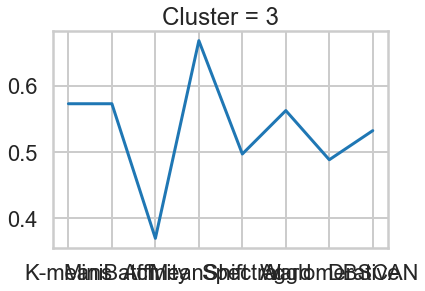

In [44]:
plt.title("Cluster = 3")
plt.plot(results)
results